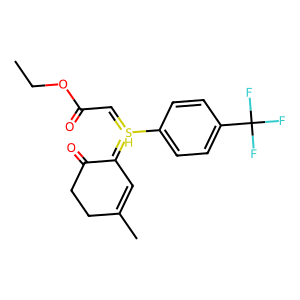

In [2]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

# smiles = 'C1=CC(=C(C=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O)O'
# smiles = "C1=CC=CC=C1"
smiles = "CCOC(=O)/C=S(/c1ccc(C(F)(F)F)cc1)=C1/C=C(\C)CCC1=O"
m = Chem.MolFromSmiles(smiles)
canon = Chem.MolToSmiles(m)

def moltosvg(mol, molSize = (300,300), kekulize = True):
    mc = Chem.Mol(mol.ToBinary())
    if kekulize:
        try:
            Chem.Kekulize(mc)
        except:
            mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
        rdDepictor.Compute2DCoords(mc)
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    return svg.replace('svg:','')

SVG(moltosvg(m))

['C1=CC=CC=C1', 'C1=CC=CC=C1']


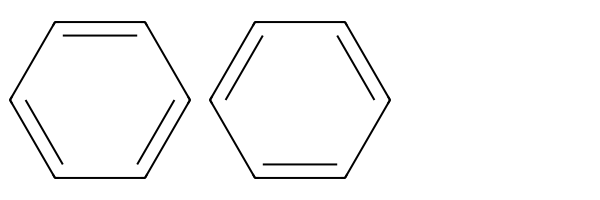

In [8]:
smls = ["C1=CC=CC=C1", "C1C=CC=CC=1"]

mols = [Chem.MolFromSmiles(sml, sanitize=False) for sml in smls]
smls_can = [Chem.MolToSmiles(mol) for mol in mols]
print(smls_can)
Chem.Draw.MolsToGridImage(mols)